In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [4]:
# Load the dataset
df = pd.read_csv('/kaggle/input/student-stress-and-stress/student_stress_addiction_v3.csv')

In [5]:
# Display the first few rows of the dataset to verify it's loaded correctly
print(df.head())

   Unnamed: 0      Timestamp   Age  Gender Is_Student  \
0         0.0  1/1/2025 0:00  24.0  Female        Yes   
1         1.0  1/1/2025 0:01  21.0  Female        Yes   
2         2.0  1/1/2025 0:02  28.0    Male        Yes   
3         4.0  1/1/2025 0:04  22.0  Female        Yes   
4         5.0  1/1/2025 0:05  24.0  Female        Yes   

   Self_Reported_Stress_Level  Overall_Stress_Level  \
0                         7.0                   3.0   
1                         4.0                   3.0   
2                         8.0                   5.0   
3                         5.0                   4.0   
4                         7.0                   5.0   

   Negative_Impact_On_Academics  Avg_Sleep_Hours_Per_Night  \
0                           3.0                        7.0   
1                           2.0                        8.0   
2                           4.0                        7.0   
3                           3.0                        7.0   
4               

In [6]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'Timestamp', 'Age', 'Gender','Is_Student','Overall_Stress_Level']  # Replace with the actual column names you want to drop
df = df.drop(columns=columns_to_drop)

In [7]:
# Find and display the number of null values in each column
null_values = df.isnull().sum()
# Display the result
print(null_values)

Self_Reported_Stress_Level       1951
Negative_Impact_On_Academics     1938
Avg_Sleep_Hours_Per_Night        1938
Anxiety_Away_From_Phone          1938
Daily_Screen_Time_Mins           1938
Self_Reported_Addiction_Scale    1938
Night_Usage_Mins                 1938
Attempts_To_Reduce_Usage         1938
Unlocks_Per_Day                  1938
Total_Notifications_Per_Day      1938
Stress_Level                     1938
Addiction_Level                  1938
dtype: int64


In [8]:
# Fill null values with the mean of each column
df = df.fillna(df.mean())

# Display the first few rows of the updated dataset
print(df.head())


   Self_Reported_Stress_Level  Negative_Impact_On_Academics  \
0                         7.0                           3.0   
1                         4.0                           2.0   
2                         8.0                           4.0   
3                         5.0                           3.0   
4                         7.0                           4.0   

   Avg_Sleep_Hours_Per_Night  Anxiety_Away_From_Phone  Daily_Screen_Time_Mins  \
0                        7.0                      1.0                   160.0   
1                        8.0                      4.0                   430.0   
2                        7.0                      3.0                   490.0   
3                        7.0                      4.0                   368.0   
4                        6.0                      3.0                   196.0   

   Self_Reported_Addiction_Scale  Night_Usage_Mins  Attempts_To_Reduce_Usage  \
0                            3.0               7.0    

In [9]:
# Find and display the number of null values in each column
null_values = df.isnull().sum()
# Display the result
print(null_values)

Self_Reported_Stress_Level       0
Negative_Impact_On_Academics     0
Avg_Sleep_Hours_Per_Night        0
Anxiety_Away_From_Phone          0
Daily_Screen_Time_Mins           0
Self_Reported_Addiction_Scale    0
Night_Usage_Mins                 0
Attempts_To_Reduce_Usage         0
Unlocks_Per_Day                  0
Total_Notifications_Per_Day      0
Stress_Level                     0
Addiction_Level                  0
dtype: int64


In [10]:
# Remove duplicate rows
df = df.drop_duplicates()

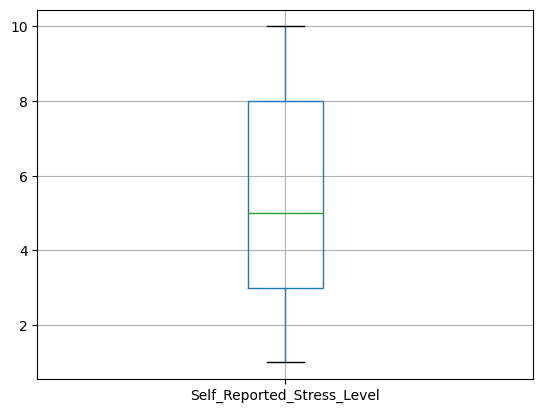

In [11]:
import matplotlib.pyplot as plt

# Plot boxplots to check for outliers in numeric columns
df[['Self_Reported_Stress_Level']].boxplot()
plt.show()

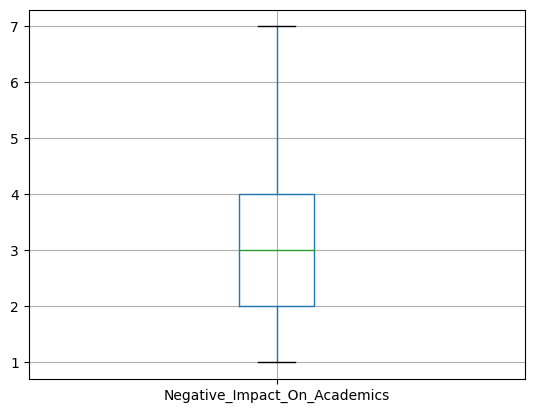

In [12]:
# Plot boxplots to check for outliers in numeric columns
df[['Negative_Impact_On_Academics']].boxplot()
plt.show()

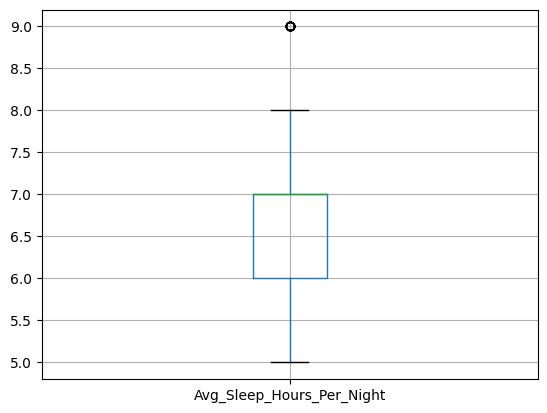

In [13]:
# Plot boxplots to check for outliers in numeric columns
df[['Avg_Sleep_Hours_Per_Night']].boxplot()
plt.show()

In [14]:
# Handle outliers using IQR method
def handle_outliers(df, columns):
    for col in columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
    return df

# Specify numeric columns to check for outliers
numeric_columns = ['Avg_Sleep_Hours_Per_Night']  # Replace with actual column names
df = handle_outliers(df, numeric_columns)

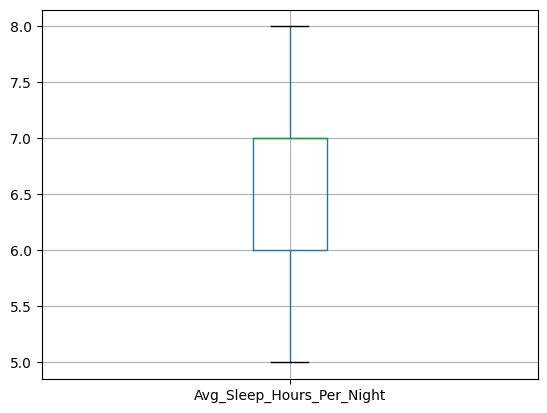

In [15]:
# Plot boxplots to check for outliers in numeric columns
df[['Avg_Sleep_Hours_Per_Night']].boxplot()
plt.show()

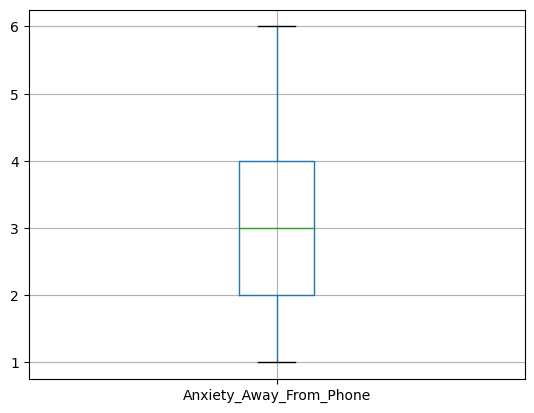

In [16]:
# Plot boxplots to check for outliers in numeric columns
df[['Anxiety_Away_From_Phone']].boxplot()
plt.show()

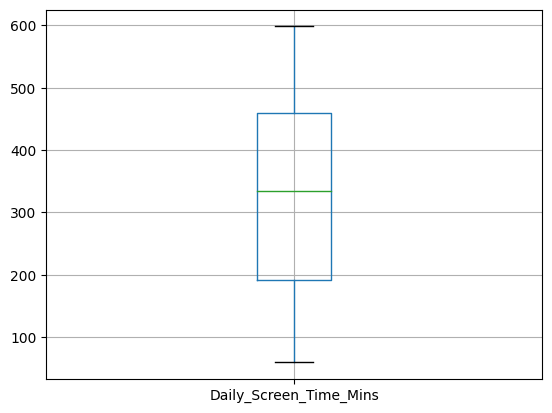

In [17]:
# Plot boxplots to check for outliers in numeric columns
df[['Daily_Screen_Time_Mins']].boxplot()
plt.show()

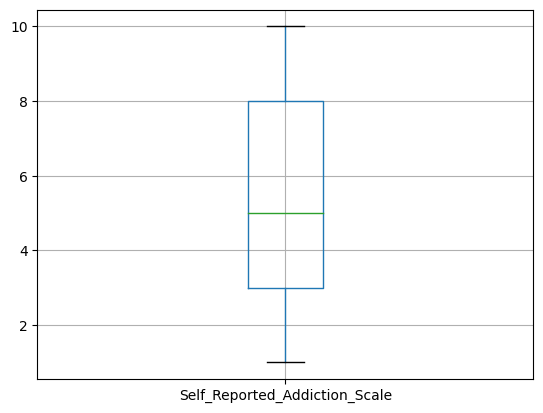

In [18]:
# Plot boxplots to check for outliers in numeric columns
df[['Self_Reported_Addiction_Scale']].boxplot()
plt.show()

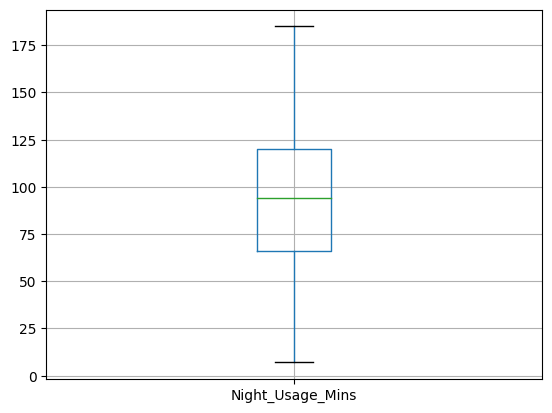

In [19]:
# Plot boxplots to check for outliers in numeric columns
df[['Night_Usage_Mins']].boxplot()
plt.show()

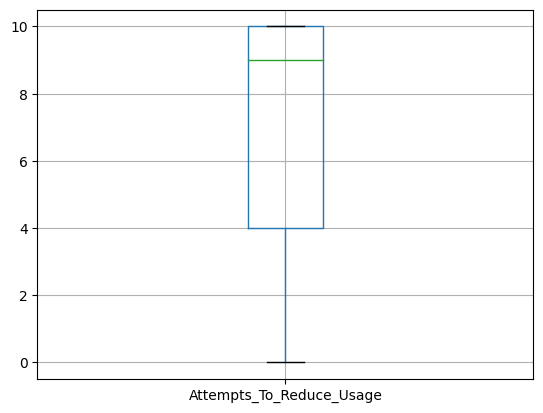

In [20]:
# Plot boxplots to check for outliers in numeric columns
df[['Attempts_To_Reduce_Usage']].boxplot()
plt.show()

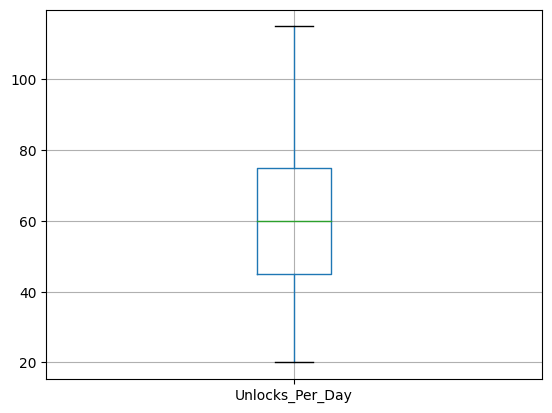

In [21]:
# Plot boxplots to check for outliers in numeric columns
df[['Unlocks_Per_Day']].boxplot()
plt.show()

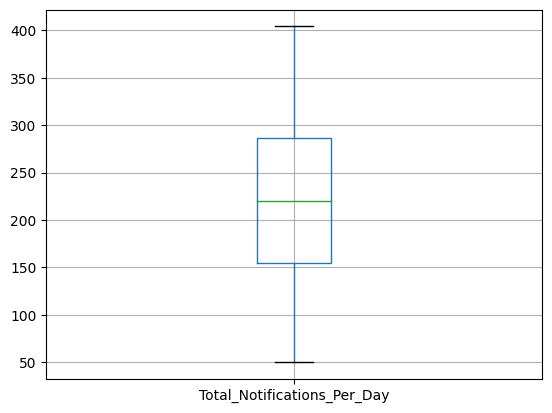

In [22]:
# Plot boxplots to check for outliers in numeric columns
df[['Total_Notifications_Per_Day']].boxplot()
plt.show()

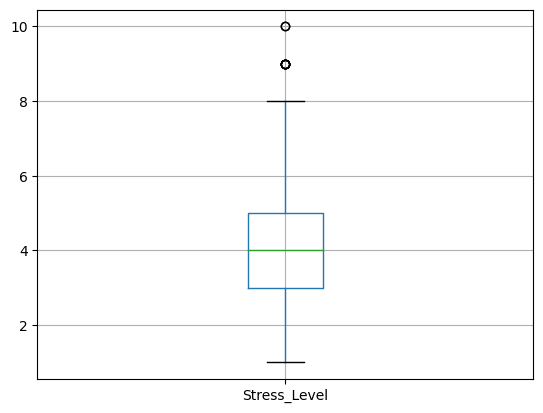

In [23]:
# Plot boxplots to check for outliers in numeric columns
df[['Stress_Level']].boxplot()
plt.show()

In [24]:
# Specify numeric columns to check for outliers
numeric_columns = ['Stress_Level']  # Replace with actual column names
df = handle_outliers(df, numeric_columns)

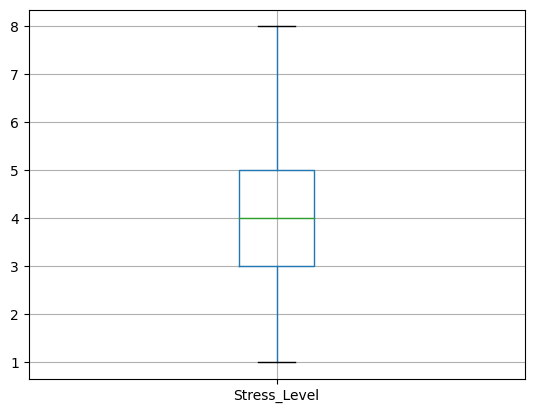

In [25]:
# Plot boxplots to check for outliers in numeric columns
df[['Stress_Level']].boxplot()
plt.show()

In [26]:
# Feature and target variables for Stress and Addiction prediction
X_stress = df[['Stress_Level', 'Negative_Impact_On_Academics',
               'Avg_Sleep_Hours_Per_Night', 'Anxiety_Away_From_Phone', 'Daily_Screen_Time_Mins']]
y_stress = df['Self_Reported_Stress_Level']

X_addiction = df[['Addiction_Level', 'Daily_Screen_Time_Mins', 'Night_Usage_Mins',
                  'Attempts_To_Reduce_Usage', 'Unlocks_Per_Day', 'Total_Notifications_Per_Day']]
y_addiction = df['Self_Reported_Addiction_Scale']

In [27]:
# Split the data into training and testing sets (80-20 split)
X_stress_train, X_stress_test, y_stress_train, y_stress_test = train_test_split(X_stress, y_stress, test_size=0.2, random_state=42)
X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test = train_test_split(X_addiction, y_addiction, test_size=0.2, random_state=42)

In [28]:
# Standardize the features (scaling)
scaler_stress = StandardScaler()
X_stress_train = scaler_stress.fit_transform(X_stress_train)
X_stress_test = scaler_stress.transform(X_stress_test)

scaler_addiction = StandardScaler()
X_addiction_train = scaler_addiction.fit_transform(X_addiction_train)
X_addiction_test = scaler_addiction.transform(X_addiction_test)

In [29]:
# Function to evaluate the models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, target):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{target} Prediction - {model_name}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    return mse, r2

In [30]:
# ----------------------------- Linear Regression Model -----------------------------
print("----- Linear Regression Model -----")
lr_model = LinearRegression()

# Cross-validation for Linear Regression
cv_scores_lr = cross_val_score(lr_model, X_stress_train, y_stress_train, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression CV Scores: {cv_scores_lr}")

# Evaluate the model for Stress and Addiction
mse_stress_lr, r2_stress_lr = evaluate_model(lr_model, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "Linear Regression", "Stress")
mse_addiction_lr, r2_addiction_lr = evaluate_model(lr_model, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "Linear Regression", "Addiction")


----- Linear Regression Model -----
Linear Regression CV Scores: [-2.17054999 -1.49751411 -1.76294018 -1.81851351 -1.8589516 ]
Stress Prediction - Linear Regression
MSE: 1.7337680366964365
R2 Score: 0.7799467090863331
Addiction Prediction - Linear Regression
MSE: 0.3772244987820565
R2 Score: 0.9537645665210701


In [31]:
# ----------------------------- Decision Tree Model -----------------------------
print("----- Decision Tree Model -----")
dt_model = DecisionTreeRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_dt = {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_stress_train, y_stress_train)

# Best parameters for Decision Tree
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")

# Evaluate the model for Stress and Addiction
mse_stress_dt, r2_stress_dt = evaluate_model(grid_search_dt.best_estimator_, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "Decision Tree", "Stress")
mse_addiction_dt, r2_addiction_dt = evaluate_model(grid_search_dt.best_estimator_, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "Decision Tree", "Addiction")

----- Decision Tree Model -----
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 5}
Stress Prediction - Decision Tree
MSE: 1.7065519266466753
R2 Score: 0.7834010319574192
Addiction Prediction - Decision Tree
MSE: 1.5614201699778478
R2 Score: 0.8086207586337596


In [32]:
# ----------------------------- Random Forest Model -----------------------------
print("----- Random Forest Model -----")
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_rf = {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_stress_train, y_stress_train)

# Best parameters for Random Forest
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

# Evaluate the model for Stress and Addiction
mse_stress_rf, r2_stress_rf = evaluate_model(grid_search_rf.best_estimator_, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "Random Forest", "Stress")
mse_addiction_rf, r2_addiction_rf = evaluate_model(grid_search_rf.best_estimator_, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "Random Forest", "Addiction")

----- Random Forest Model -----
Best parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 500}
Stress Prediction - Random Forest
MSE: 1.6459585621209833
R2 Score: 0.7910916624161607
Addiction Prediction - Random Forest
MSE: 1.1411993110633127
R2 Score: 0.860126145032396


In [33]:
# ----------------------------- Gradient Boosting Model -----------------------------
print("----- Gradient Boosting Model -----")
gb_model = GradientBoostingRegressor(random_state=42)

# Evaluate the Gradient Boosting model for Stress and Addiction
mse_stress_gb, r2_stress_gb = evaluate_model(gb_model, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "Gradient Boosting", "Stress")
mse_addiction_gb, r2_addiction_gb = evaluate_model(gb_model, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "Gradient Boosting", "Addiction")

----- Gradient Boosting Model -----
Stress Prediction - Gradient Boosting
MSE: 1.7393460166885524
R2 Score: 0.779238740760735
Addiction Prediction - Gradient Boosting
MSE: 0.7313815188199898
R2 Score: 0.9103564543917451


In [34]:
from sklearn.svm import SVR
# ----------------------------- Support Vector Regressor Model -----------------------------
print("----- Support Vector Regressor Model -----")
svr_model = SVR()
# Hyperparameter tuning using GridSearchCV
param_grid_svr = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid_search_svr = GridSearchCV(svr_model, param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_stress_train, y_stress_train)
# Best parameters for SVR
print(f"Best parameters for SVR: {grid_search_svr.best_params_}")
# Evaluate the model for Stress and Addiction
mse_stress_svr, r2_stress_svr = evaluate_model(grid_search_svr.best_estimator_, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "SVR", "Stress")
mse_addiction_svr, r2_addiction_svr = evaluate_model(grid_search_svr.best_estimator_, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "SVR", "Addiction")

----- Support Vector Regressor Model -----
Best parameters for SVR: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Stress Prediction - SVR
MSE: 1.716774237108504
R2 Score: 0.7821035959623752
Addiction Prediction - SVR
MSE: 0.4755533218083417
R2 Score: 0.9417126563965372


In [35]:
from sklearn.neighbors import KNeighborsRegressor
# ----------------------------- K-Nearest Neighbors Model -----------------------------
print("----- K-Nearest Neighbors Model -----")
knn_model = KNeighborsRegressor()
# Hyperparameter tuning using GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_stress_train, y_stress_train)
# Best parameters for KNN
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")

# Evaluate the model for Stress and Addiction
mse_stress_knn, r2_stress_knn = evaluate_model(grid_search_knn.best_estimator_, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "KNN", "Stress")
mse_addiction_knn, r2_addiction_knn = evaluate_model(grid_search_knn.best_estimator_, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "KNN", "Addiction")


----- K-Nearest Neighbors Model -----
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Stress Prediction - KNN
MSE: 1.9764687114312047
R2 Score: 0.7491426562649901
Addiction Prediction - KNN
MSE: 0.7889592975133849
R2 Score: 0.9032992946228589


In [36]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
# ----------------------------- ElasticNet Regression Model -----------------------------
print("----- ElasticNet Regression Model -----")
elasticnet_model = ElasticNet()

# Hyperparameter tuning using GridSearchCV
param_grid_elasticnet = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9, 1]}
grid_search_elasticnet = GridSearchCV(elasticnet_model, param_grid_elasticnet, cv=5, scoring='neg_mean_squared_error')
grid_search_elasticnet.fit(X_stress_train, y_stress_train)

# Best parameters for ElasticNet
print(f"Best parameters for ElasticNet: {grid_search_elasticnet.best_params_}")

# Evaluate the model for Stress and Addiction
mse_stress_elasticnet, r2_stress_elasticnet = evaluate_model(grid_search_elasticnet.best_estimator_, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "ElasticNet", "Stress")
mse_addiction_elasticnet, r2_addiction_elasticnet = evaluate_model(grid_search_elasticnet.best_estimator_, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "ElasticNet", "Addiction")


----- ElasticNet Regression Model -----
Best parameters for ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.1}
Stress Prediction - ElasticNet
MSE: 1.7321522728433774
R2 Score: 0.7801517850513293
Addiction Prediction - ElasticNet
MSE: 0.48609453811717274
R2 Score: 0.9404206467126287


In [37]:
import xgboost as xgb

# ----------------------------- XGBoost Regressor Model -----------------------------
print("----- XGBoost Regressor Model -----")
xgb_model = xgb.XGBRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_xgb = {'n_estimators': [100, 200, 500], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'subsample': [0.8, 1.0]}
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_stress_train, y_stress_train)

# Best parameters for XGBoost
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")

# Evaluate the model for Stress and Addiction
mse_stress_xgb, r2_stress_xgb = evaluate_model(grid_search_xgb.best_estimator_, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "XGBoost", "Stress")
mse_addiction_xgb, r2_addiction_xgb = evaluate_model(grid_search_xgb.best_estimator_, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "XGBoost", "Addiction")


----- XGBoost Regressor Model -----
Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Stress Prediction - XGBoost
MSE: 1.6807034006377888
R2 Score: 0.7866817783393638
Addiction Prediction - XGBoost
MSE: 0.8813561090923548
R2 Score: 0.8919744558352994


In [38]:
import lightgbm as lgb
# ----------------------------- LightGBM Regressor Model -----------------------------
print("----- LightGBM Regressor Model -----")
lgbm_model = lgb.LGBMRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_lgbm = {'n_estimators': [100, 200, 500], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'subsample': [0.8, 1.0]}
grid_search_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=5, scoring='neg_mean_squared_error')
grid_search_lgbm.fit(X_stress_train, y_stress_train)

# Best parameters for LightGBM
print(f"Best parameters for LightGBM: {grid_search_lgbm.best_params_}")

# Evaluate the model for Stress and Addiction
mse_stress_lgbm, r2_stress_lgbm = evaluate_model(grid_search_lgbm.best_estimator_, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "LightGBM", "Stress")
mse_addiction_lgbm, r2_addiction_lgbm = evaluate_model(grid_search_lgbm.best_estimator_, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "LightGBM", "Addiction")


----- LightGBM Regressor Model -----
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 244
[LightGBM] [Info] Number of data points in the train set: 639, number of used features: 5
[LightGBM] [Info] Start training from score 5.487372
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [39]:

from catboost import CatBoostRegressor

# ----------------------------- CatBoost Regressor Model -----------------------------
print("----- CatBoost Regressor Model -----")
catboost_model = CatBoostRegressor(silent=True, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_catboost = {'iterations': [100, 200, 500], 'learning_rate': [0.01, 0.1, 0.2], 'depth': [3, 5, 7], 'l2_leaf_reg': [1, 3, 5]}
grid_search_catboost = GridSearchCV(catboost_model, param_grid_catboost, cv=5, scoring='neg_mean_squared_error')
grid_search_catboost.fit(X_stress_train, y_stress_train)

# Best parameters for CatBoost
print(f"Best parameters for CatBoost: {grid_search_catboost.best_params_}")

# Evaluate the model for Stress and Addiction
mse_stress_catboost, r2_stress_catboost = evaluate_model(grid_search_catboost.best_estimator_, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "CatBoost", "Stress")
mse_addiction_catboost, r2_addiction_catboost = evaluate_model(grid_search_catboost.best_estimator_, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "CatBoost", "Addiction")


----- CatBoost Regressor Model -----
Best parameters for CatBoost: {'depth': 3, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Stress Prediction - CatBoost
MSE: 1.634174853385689
R2 Score: 0.7925872741886043
Addiction Prediction - CatBoost
MSE: 1.0789709091324138
R2 Score: 0.8677533196916922


In [40]:
# Save results to a DataFrame for comparison
results = [
    {"Model": "Linear Regression", "Stress MSE": mse_stress_lr, "Stress R2": r2_stress_lr, "Addiction MSE": mse_addiction_lr, "Addiction R2": r2_addiction_lr},
    {"Model": "Decision Tree", "Stress MSE": mse_stress_dt, "Stress R2": r2_stress_dt, "Addiction MSE": mse_addiction_dt, "Addiction R2": r2_addiction_dt},
    {"Model": "Random Forest", "Stress MSE": mse_stress_rf, "Stress R2": r2_stress_rf, "Addiction MSE": mse_addiction_rf, "Addiction R2": r2_addiction_rf},
    {"Model": "Gradient Boosting", "Stress MSE": mse_stress_gb, "Stress R2": r2_stress_gb, "Addiction MSE": mse_addiction_gb, "Addiction R2": r2_addiction_gb},
    {"Model": "Support Vector Regressor", "Stress MSE": mse_stress_svr, "Stress R2": r2_stress_svr, "Addiction MSE": mse_addiction_svr, "Addiction R2": r2_addiction_svr},
    {"Model": "K-Nearest Neighbors", "Stress MSE": mse_stress_knn, "Stress R2": r2_stress_knn, "Addiction MSE": mse_addiction_knn, "Addiction R2": r2_addiction_knn},
    {"Model": "ElasticNet", "Stress MSE": mse_stress_elasticnet, "Stress R2": r2_stress_elasticnet, "Addiction MSE": mse_addiction_elasticnet, "Addiction R2": r2_addiction_elasticnet},
    {"Model": "XGBoost", "Stress MSE": mse_stress_xgb, "Stress R2": r2_stress_xgb, "Addiction MSE": mse_addiction_xgb, "Addiction R2": r2_addiction_xgb},
    {"Model": "LightGBM", "Stress MSE": mse_stress_lgbm, "Stress R2": r2_stress_lgbm, "Addiction MSE": mse_addiction_lgbm, "Addiction R2": r2_addiction_lgbm},
    {"Model": "CatBoost", "Stress MSE": mse_stress_catboost, "Stress R2": r2_stress_catboost, "Addiction MSE": mse_addiction_catboost, "Addiction R2": r2_addiction_catboost}
]
# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("\n----- Model Comparison Results -----")
print(results_df)


----- Model Comparison Results -----
                      Model  Stress MSE  Stress R2  Addiction MSE  \
0         Linear Regression    1.733768   0.779947       0.377224   
1             Decision Tree    1.706552   0.783401       1.561420   
2             Random Forest    1.645959   0.791092       1.141199   
3         Gradient Boosting    1.739346   0.779239       0.731382   
4  Support Vector Regressor    1.716774   0.782104       0.475553   
5       K-Nearest Neighbors    1.976469   0.749143       0.788959   
6                ElasticNet    1.732152   0.780152       0.486095   
7                   XGBoost    1.680703   0.786682       0.881356   
8                  LightGBM    1.667953   0.788300       0.906749   
9                  CatBoost    1.634175   0.792587       1.078971   

   Addiction R2  
0      0.953765  
1      0.808621  
2      0.860126  
3      0.910356  
4      0.941713  
5      0.903299  
6      0.940421  
7      0.891974  
8      0.888862  
9      0.867753  


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


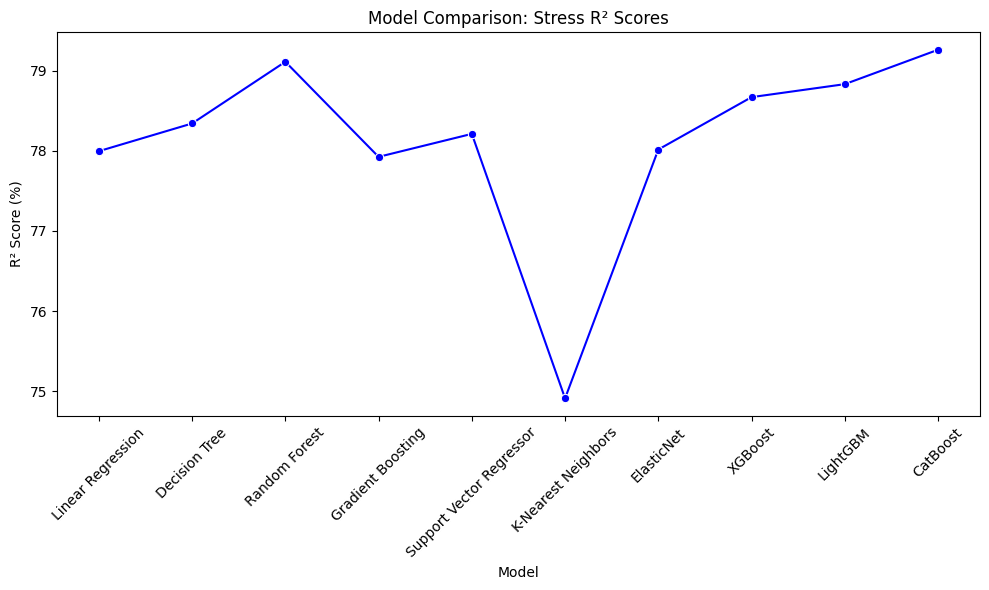

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


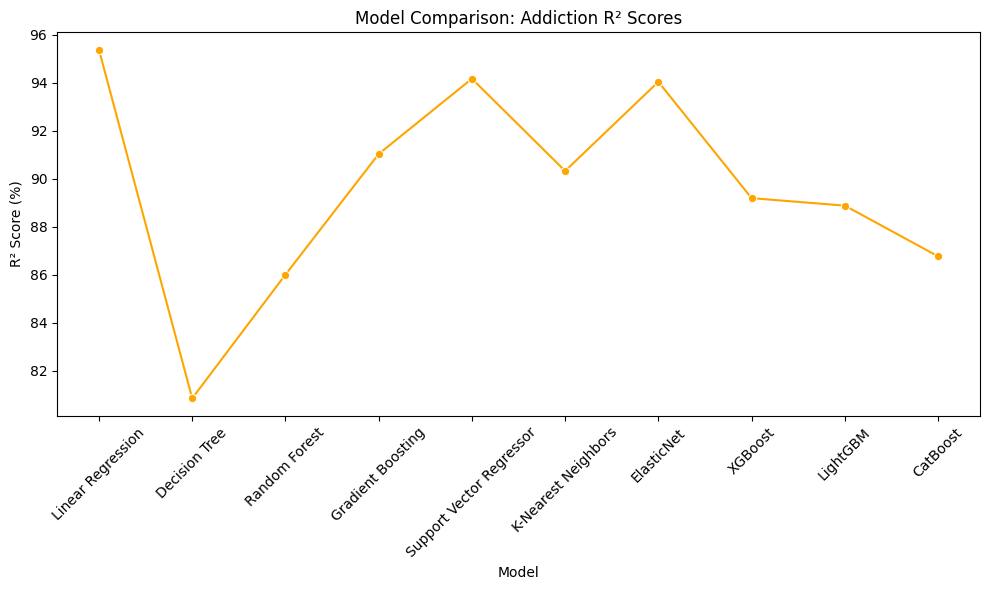

In [41]:
# Convert R² scores to percentages
results_df['Stress R2 (%)'] = results_df['Stress R2'] * 100
results_df['Addiction R2 (%)'] = results_df['Addiction R2'] * 100

# ----------------------------- Plot for Stress R² -----------------------------
plt.figure(figsize=(10, 6))

# Plot Stress R² as a line plot
sns.lineplot(x='Model', y='Stress R2 (%)', data=results_df, marker='o', color='blue')

# Customize the plot for Stress
plt.title('Model Comparison: Stress R² Scores')
plt.ylabel('R² Score (%)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the Stress plot
plt.show()

# ----------------------------- Plot for Addiction R² -----------------------------
plt.figure(figsize=(10, 6))

# Plot Addiction R² as a line plot
sns.lineplot(x='Model', y='Addiction R2 (%)', data=results_df, marker='o', color='orange')

# Customize the plot for Addiction
plt.title('Model Comparison: Addiction R² Scores')
plt.ylabel('R² Score (%)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the Addiction plot
plt.show()


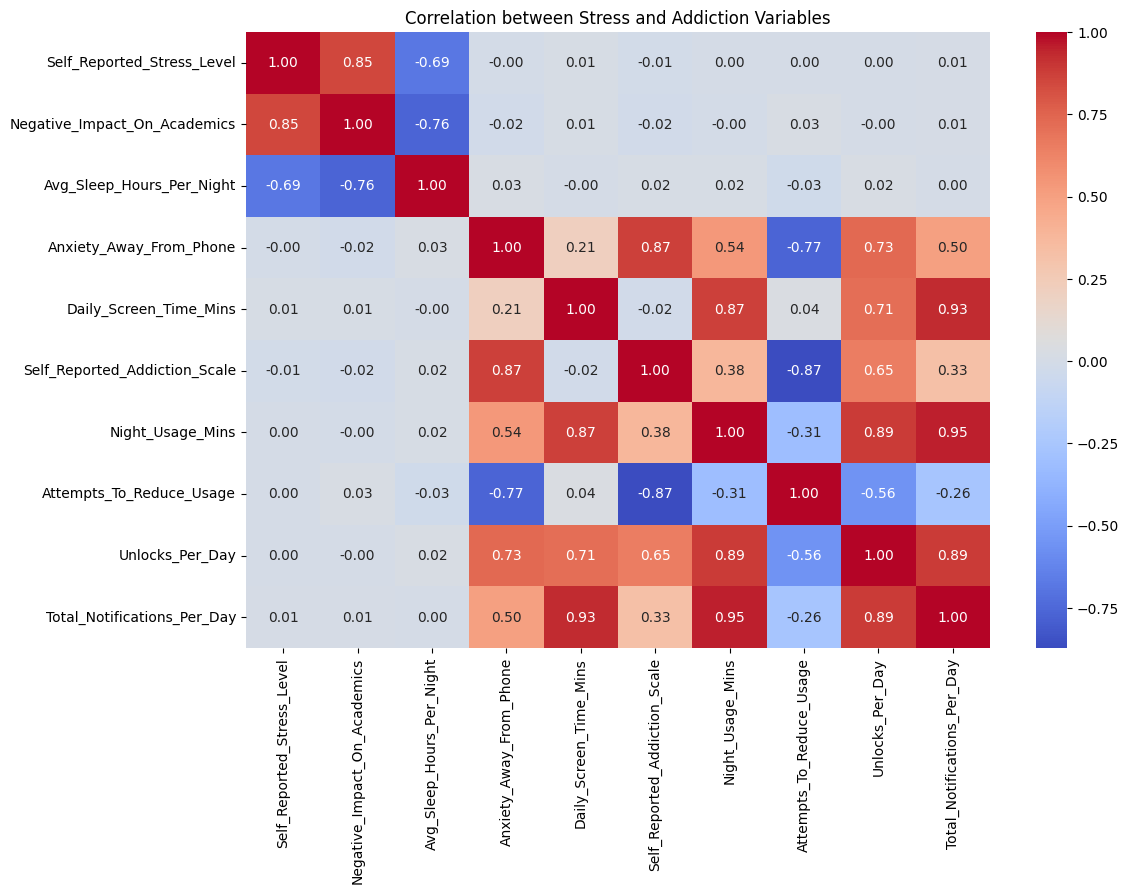

In [42]:
# Calculate the correlation matrix between stress and addiction-related variables
stress_columns = ['Self_Reported_Stress_Level', 'Negative_Impact_On_Academics', 'Avg_Sleep_Hours_Per_Night', 
                  'Anxiety_Away_From_Phone', 'Daily_Screen_Time_Mins']

addiction_columns = ['Self_Reported_Addiction_Scale', 'Night_Usage_Mins', 'Attempts_To_Reduce_Usage', 
                     'Unlocks_Per_Day', 'Total_Notifications_Per_Day']

# Extract the relevant columns
stress_data = df[stress_columns]
addiction_data = df[addiction_columns]

# Combine stress and addiction data
combined_data = pd.concat([stress_data, addiction_data], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Stress and Addiction Variables')
plt.show()
